<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-données" data-toc-modified-id="Les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les données</a></span><ul class="toc-item"><li><span><a href="#Traitement-des-données-manquantes" data-toc-modified-id="Traitement-des-données-manquantes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Traitement des données manquantes</a></span></li><li><span><a href="#Conversion-des-variables-catégorielles" data-toc-modified-id="Conversion-des-variables-catégorielles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conversion des variables catégorielles</a></span></li></ul></li><li><span><a href="#Régression-logistique" data-toc-modified-id="Régression-logistique-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Régression logistique</a></span><ul class="toc-item"><li><span><a href="#Evaluation-des-performances." data-toc-modified-id="Evaluation-des-performances.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Evaluation des performances.</a></span><ul class="toc-item"><li><span><a href="#Evaluation-des-performances" data-toc-modified-id="Evaluation-des-performances-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Evaluation des performances</a></span></li></ul></li></ul></li><li><span><a href="#Courbe-ROC" data-toc-modified-id="Courbe-ROC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Courbe ROC</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

# Les données

<font color="red">Charger le fichier csv 'data/titanic_train.csv' sour forme de dataframe.</font>

In [2]:
df = pd.read_csv('../data/titanic_train.csv')

<font color='red'>
Inspecter les données, afficher les premières lignes.
</font>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color="red">
Utiliser la méthode "describe" et répondre aux questions suivantes :  
- Moyenne d'âge des passagers ?  
- Âge du passager le plus âgé ?  
- Pourcentage de passagers ayant survécu ?  
</font>

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color="red">Calculer :  
- le nombre d'hommes  
- le nombre de survivants chez les hommes
</font>

In [5]:
(df['Sex']=='male').sum(), df[df['Sex']=='male']['Survived'].sum()

(577, 109)

<font color="red">Tracer l'histogramme des âges et/ou des classes</font>

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

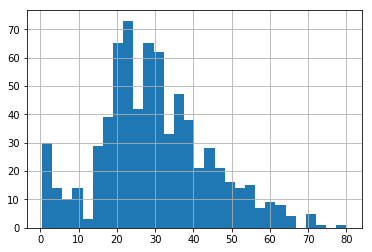

In [7]:
df['Age'].hist(bins=30);

## Traitement des données manquantes

<font color="red">Evaluer le nombre de données manquantes par colonne</font>

In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<font color="red">
Supprimer les colonnes 'Cabin','PassengerId','Name','Ticket'.
</font>

In [9]:
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],  inplace=True)

<font color="red">
Avec la méthode fillna(), créer une nouvelle dataframe où les NaN sont remplacées par la médiane de la colonne.
</font>

In [10]:
df.fillna(df.median()).tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,28.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


Une approche plus pertinente consiste à remplacer les valeurs manquantes par l'âge moyen de la classe correspondante.  
<font color="red">
En utilisant groupby(), évaluer la moyenne d'âge au sein de chaque classe.
</font>

In [11]:
moy_age = df.groupby('Pclass').mean()['Age']
moy_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<font color="red">
Créer une fonction "impute_age" qui à toute liste (age,classe) retourne  
- l'âge moyen de la classe lorsque age = NaN  
- age sinon
</font>

In [12]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isna(age):
        return moy_age[pclass]
    else:
        return age

<font color="red">
Avec la méthode apply(), appliquer cette fonction à chaque ligne de la dataframe df[['Age','Pclass']]  
Substituer la colonne obtenue à la colonne 'Age'</font>

In [13]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

<font color="red">
Vérifier qu'il n'y a plus de données manquantes, ou s'il en reste quelques unes, supprimer les lignes correspondantes.</font>

In [14]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [15]:
df.dropna(inplace=True)
df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

## Conversion des variables catégorielles

<font color="red">
Vérifier que 'sex' et 'embark' sont les seules variables catégorielles. On pourra par exemple utiliser la méthode df.dtypes 
</font>


In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<font color="red">
    À l'aide de la méthode pandas: df.get_dummies ou (c'est plus difficile) des méthodes scikit learn: LabelEncoder et OneHotEncoder, convertissez ces colonnes en variables "one-hot". On renvoie à l'aide de scikit learn: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
<font> 
<font color="black"> Dans une version beta de scikit, on y trouve la classe CategoricalEncoder; pour ceux qui l'ont, vous êtes libres de vous en servir.
    <font> 

In [17]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [18]:
df.drop(columns=['Sex','Embarked'],inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Remarque : nous choisissons d'utiliser les fonctionnalités de Pandas, mais nous pourrions faire la même chose en scikit learn avec le code suivant :

In [19]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#le = LabelEncoder()
#enc = OneHotEncoder()
#sex = df[['Sex']].apply(le.fit_transform)
#sex = pd.DataFrame(enc.fit_transform(sex).toarray(), columns=le.classes_)
#embark = df[['Embarked']].apply(le.fit_transform)
#embark = pd.DataFrame(enc.fit_transform(embark).toarray(), columns=le.classes_)
#df1 = pd.concat([df.drop(['Sex', 'Embarked'], 1), sex, embark], axis=1)

# Régression logistique

In [20]:
# Réponse et matrice de design
y = df.Survived.values
X = df.drop(columns='Survived').values
feature_names = df.drop(columns='Survived').columns
print(y[:5])
print(X[:4,:])

[0 1 1 1 0]
[[ 3.     22.      1.      0.      7.25    1.      0.      1.    ]
 [ 1.     38.      1.      0.     71.2833  0.      0.      0.    ]
 [ 3.     26.      0.      0.      7.925   0.      0.      1.    ]
 [ 1.     35.      1.      0.     53.1     0.      0.      1.    ]]


<font color="red">
Utilisez scikit-learn et la classe LogisticRegression de sklearn.linear_model pour entraîner un classifieur sur les données d'apprentissage. Essayez de justifier le choix de vos paramètres.
</font>

Pour davantage d'informations, on renvoie à la documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression(C=1e15)
classifier.fit(X,y)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Evaluation des performances.

<font color="red">
En utilisant la fonction train_test_split du module sklearn.model_selection, séparer la dataframe en une data-frame de données et un data-frame de test (on choisira un découpage de la base en 90% de train et 10% de test).
</font>


On renvoie à la documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

Quel paramètre nous permettrait de rendre notre split reproductible?

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.1, random_state=42)

<font color="red">
Apprendre le modèle sur la base de train en utilisant l'un des algorithmes vus plus haut.
</font>

In [24]:
classifier = classifier.fit(Xtrain,ytrain)

### Evaluation des performances

La matrice de confusion est
$$
\begin{pmatrix}
tp & fp \\ fn & tn
\end{pmatrix}
$$
où
- tp = nombre de vrais positifs (la vraie valeur est 1, la décision est 1)
- fp = nombre de faux positifs (la vraie valeur est 0, la décision est 1 : erreur de type I ou "fausse alarme")
- fn = nombre de faux négatifs (la vraie valeur est 1, la décision est 0 : erreur de type II ou "manque")
- tn = nombre de vrais négatifs (la vraie valeur est 0, la décision est 0)  

In [25]:
from sklearn.metrics import confusion_matrix
hard = classifier.predict(Xtest)
confusion_matrix_ = confusion_matrix(ytest, hard)
print(confusion_matrix_)

[[47 11]
 [ 5 26]]


<font color="red">
Complétez les deux dernières déclarations et comparez les deux matrices de confusion.
</font>

In [26]:
p = (ytest==1)
n = (ytest==0)
t = (ytest==hard)
f = (ytest!=hard)
tp = (t & p).sum()
tn = (t & n).sum()
fp = (f & p).sum()
fn = (f & n).sum()
confusion_matrix = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix)

[[26  5]
 [11 47]]


<font color="red">
Estimer :  
- la probabilité de fausse alarme  (c'est à dire la probabilité de décider '1' lorsque le label est '0')  
- la puissance (c'est à dire la probabilité de décider '1' lorsque le label est '1')
</font>

In [27]:
pfa = fp/(fp+tp)
power = tp/(fn+tp)
pfa,power

(0.16129032258064516, 0.7027027027027027)

# Courbe ROC
Si on diminue le seuil, on augmente le nombre de fausses alarmes et on augmente également la puissance.  
La courbe ROC est l'ensemble des couples (pfa,power) pour toutes les valeurs de seuil possibles.  


In [28]:
from sklearn.metrics import roc_curve, classification_report, roc_auc_score

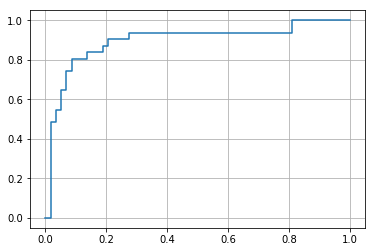

In [29]:
soft = classifier.predict_proba(Xtest)[:,1]
pfa, power, _ = roc_curve(ytest,soft)
plt.plot(pfa,power);
plt.grid()

Good Job ! 